In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/major_project/StrokeDataset/healthcare-dataset-stroke-data.csv')
df = df.drop('id',axis=1)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
categorical_features = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type', 'smoking_status',	'stroke']
unique_values = {col:df[col].unique() for col in categorical_features}


In [ ]:
for col, values in unique_values.items():
  print(f'{col}:{values}')

gender:['Male' 'Female' 'Other']
hypertension:[0 1]
heart_disease:[1 0]
ever_married:['Yes' 'No']
work_type:['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type:['Urban' 'Rural']
smoking_status:['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke:[1 0]


In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
y = df['stroke']
y.value_counts(normalize=True)*100

,proportion
stroke,
0,95.127202
1,4.872798


In [ ]:
import plotly.express as px
px.bar(x=y.value_counts().index, y=y.value_counts(),color=y.value_counts().index)

In [ ]:
numerical_features = ['age','avg_glucose_level','bmi']
df[numerical_features].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


skewness


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

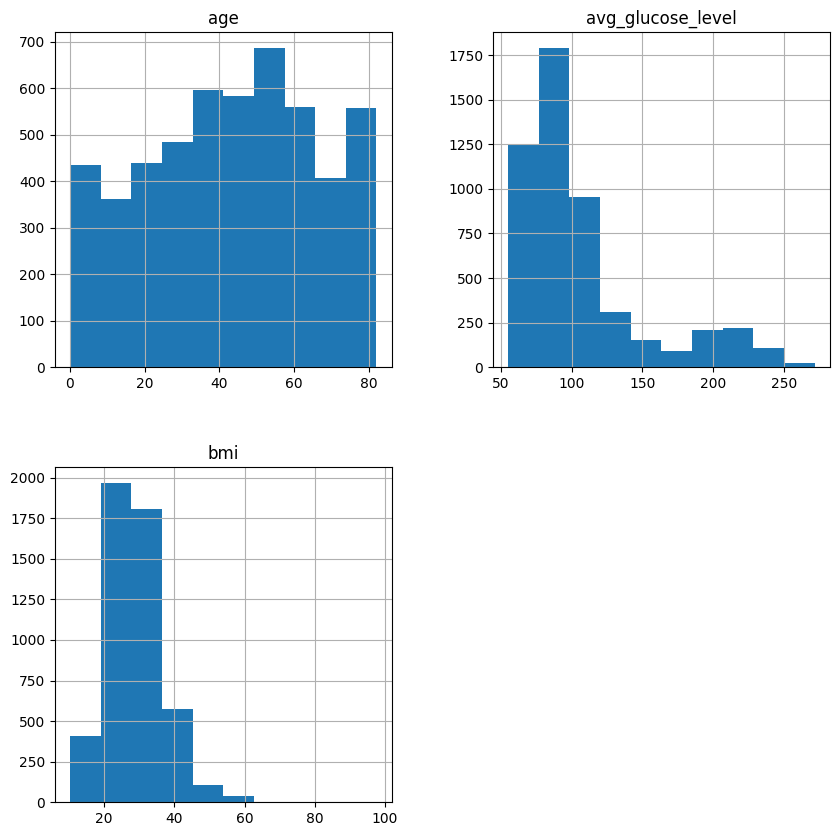

In [ ]:
 df[numerical_features].hist(figsize=(10,10))

In [ ]:
fig = px.histogram(df,x='gender',width=400)
fig.show()

male--> having stroke

In [ ]:
round(df[df['gender']=='Male']['stroke'].mean()*100,2)

5.11

female --> having chance of stroke

In [ ]:
round(df[df['gender']=='Female']['stroke'].mean()*100,2)

4.71

In [ ]:
fig = px.histogram(df,x='hypertension',width=400)
fig.show()

In [ ]:
round(df[df['hypertension']==1]['stroke'].mean()*100,2)

13.25

In [ ]:
round(df[df['hypertension']==0]['stroke'].mean()*100,2)

3.97

In [ ]:
fig = px.histogram(df,x='heart_disease',width=400)
fig.show()

In [ ]:
round(df[df['heart_disease']==1]['stroke'].mean()*100,2)

17.03

In [ ]:
round(df[df['heart_disease']==0]['stroke'].mean()*100,2)

4.18

In [ ]:
fig = px.histogram(df,x='ever_married',width=400)
fig.show()

In [ ]:
round(df[df['ever_married']=='Yes']['stroke'].mean()*100,2)

6.56

In [ ]:
round(df[df['ever_married']=='No']['stroke'].mean()*100,2)

1.65

In [ ]:
fig = px.histogram(df,x='work_type',width=400)
fig.show()

In [ ]:
stroke_percentages_work_type = df.groupby('work_type')['stroke'].mean() * 100
stroke_percentages_work_type

,stroke
work_type,
Govt_job,5.022831
Never_worked,0.000000
Private,5.094017
Self-employed,7.936508
children,0.291121


In [ ]:
fig = px.histogram(df,x='Residence_type',width=400)
fig.show()

In [ ]:
stroke_percentages_residence_type = df.groupby('Residence_type')['stroke'].mean() * 100
stroke_percentages_residence_type

,stroke
Residence_type,
Rural,4.534606
Urban,5.200308


In [ ]:
fig = px.histogram(df,x='smoking_status',width=400)
fig.show()

In [ ]:
stroke_prediction_smoking_status = df.groupby('smoking_status')['stroke'].mean() * 100
stroke_prediction_smoking_status

,stroke
smoking_status,
Unknown,3.044041
formerly smoked,7.909605
never smoked,4.756871
smokes,5.323194


In [ ]:
from sklearn.metrics import mutual_info_score
categorical_features = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type', 'smoking_status']
for col in categorical_features:
  print(f'{col}:{mutual_info_score(df[col],df["stroke"]):.2f}')

gender:0.00
hypertension:0.01
heart_disease:0.01
ever_married:0.01
work_type:0.01
Residence_type:0.00
smoking_status:0.00


In [ ]:
df[numerical_features + ['stroke']].corr()

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.238171,0.333398,0.245257
avg_glucose_level,0.238171,1.000000,0.175502,0.131945
bmi,0.333398,0.175502,1.000000,0.042374
stroke,0.245257,0.131945,0.042374,1.000000


Machine learning models

In [ ]:
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE


numerical = ['age','avg_glucose_level','bmi']
categorical = ['hypertension','heart_disease','ever_married','work_type','Residence_type', 'smoking_status']

transformer = ColumnTransformer(transformers=[
    ('num',Pipeline(steps =[('imputer',SimpleImputer(strategy='median')),('power',PowerTransformer(method='yeo-johnson',standardize=True))]),numerical),
    ('cat',OneHotEncoder(),categorical)
])



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
from os import name
def get_models():
    models, names = list(), list()
    models.append(LogisticRegression())
    names.append('LogisticRegression')
    models.append(LinearDiscriminantAnalysis())
    names.append('LinearDiscriminantAnalysis')
    models.append(RandomForestClassifier(n_estimators=100))
    names.append('RandomForestClassifier')
    models.append(DecisionTreeClassifier())
    names.append('DecisionTree')
    models.append(KNeighborsClassifier(n_neighbors=5))
    names.append('KNN')
    models.append(SVC(probability=True))  # Enable probability for ROC AUC
    names.append('SVM')
    return models, names
def evaluate_model(model,x,y):
  cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
  scores = cross_val_score(model,x,y,scoring='roc_auc',cv=cv,n_jobs=-1)
  return scores

In [ ]:
from imblearn.pipeline import Pipeline as IMBPipeline
y=df['stroke']
x=df.drop('stroke',axis=1)

models, names = get_models()
results = list()

for i in range(len(models)):
  IMBpipeline = IMBPipeline(steps=[('transformer',transformer),('smote',SMOTE()),('model',models[i])])
  scores = evaluate_model(IMBpipeline,x,y)
  results.append(scores)
  print(f'{names[i]}:{scores.mean():.3f}({scores.std():.3f})')

LogisticRegression:0.837(0.029)
LinearDiscriminantAnalysis:0.839(0.028)
RandomForestClassifier:0.781(0.033)
DecisionTree:0.571(0.035)
KNN:0.648(0.046)
SVM:0.782(0.033)


Saving the model

In [ ]:
from joblib import dump
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Define the transformer for preprocessing
transformer = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('power', PowerTransformer(method='yeo-johnson', standardize=True))
    ]), numerical),
    ('cat', OneHotEncoder(), categorical)
])



In [ ]:
# Define the LDA pipeline
lda_pipeline = IMBPipeline(steps=[
    ('transformer', transformer),
    ('smote', SMOTE()),
    ('model', LinearDiscriminantAnalysis())
])


In [ ]:
# Train the model
lda_pipeline.fit(x_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat', OneHotEncoder(),
                                                  ['hypertension',
                                                   'heart_disease',
                                                   'ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('smote', SMOTE()), ('model', LinearDiscriminantAnalysis())])

In [ ]:
import joblib
# Save the model to a file
joblib.dump(lda_pipeline, 'lda_model.joblib')
print("LDA model saved as 'lda_model.joblib'")

LDA model saved as 'lda_model.joblib'


confusion matrix


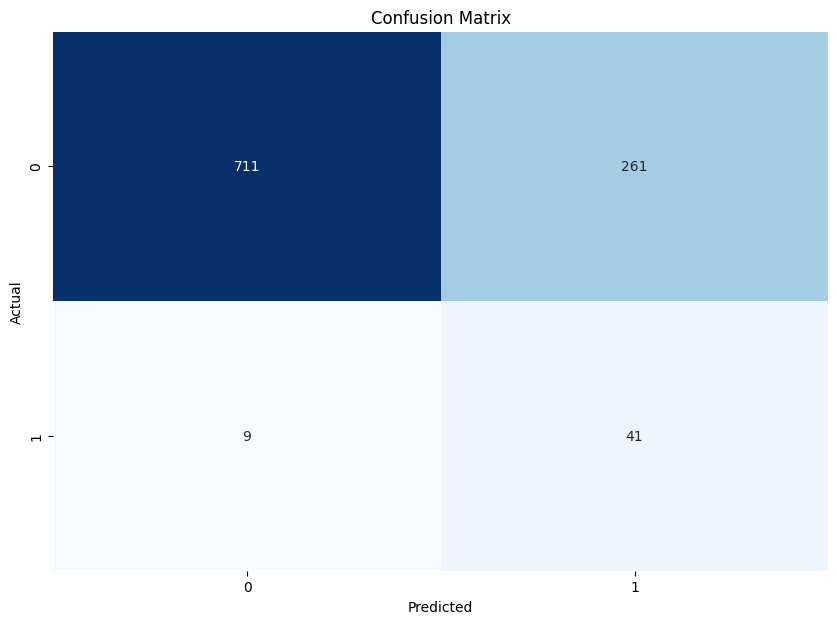

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example for a model's predictions and ground truth
y_pred = lda_pipeline.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


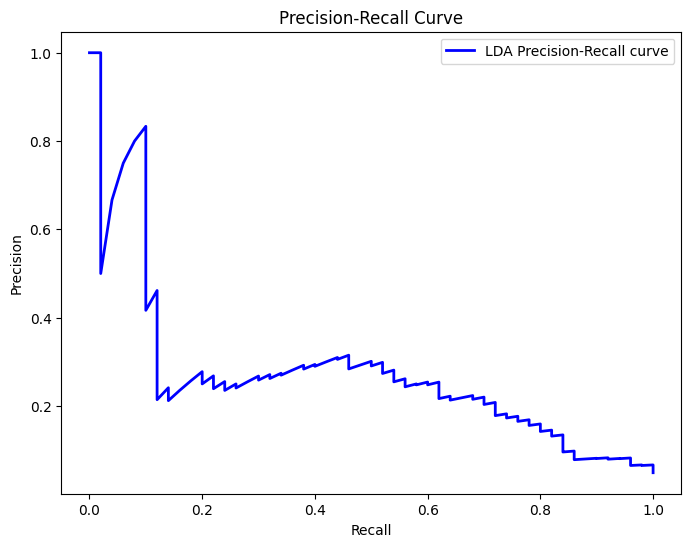

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get precision and recall values
y_prob = lda_pipeline.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='blue', lw=2, label='LDA Precision-Recall curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()


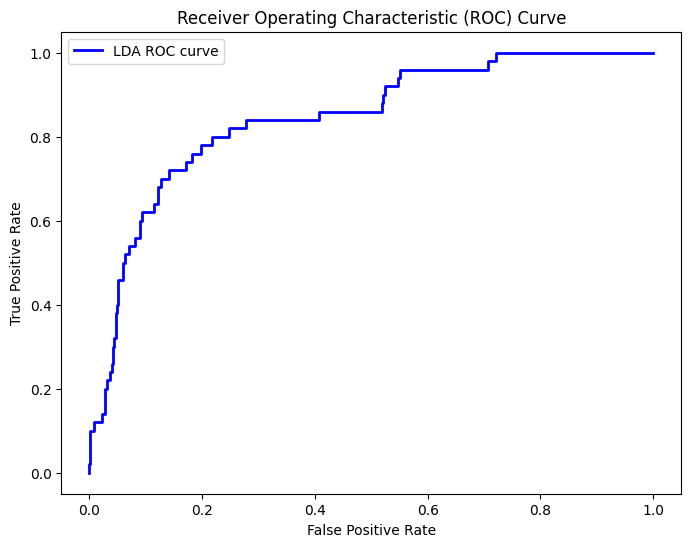

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='LDA ROC curve')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


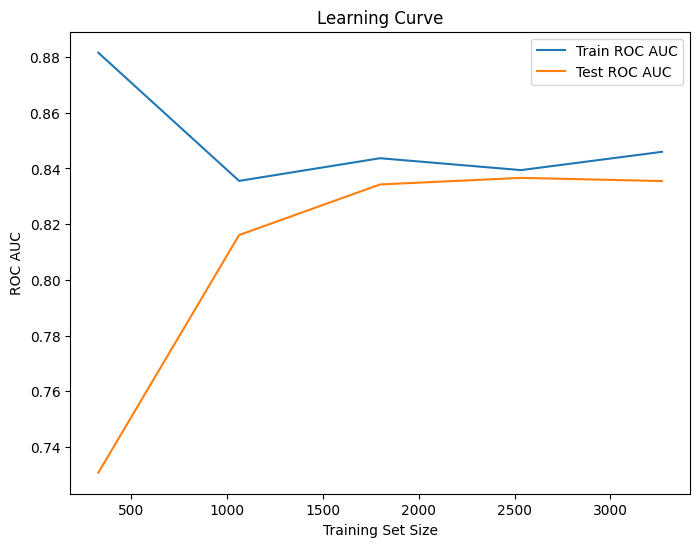

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    lda_pipeline, x_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Train ROC AUC')
plt.plot(train_sizes, test_mean, label='Test ROC AUC')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('ROC AUC')
plt.legend(loc='best')
plt.show()


<ipython-input-51-66711459a453>:1: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



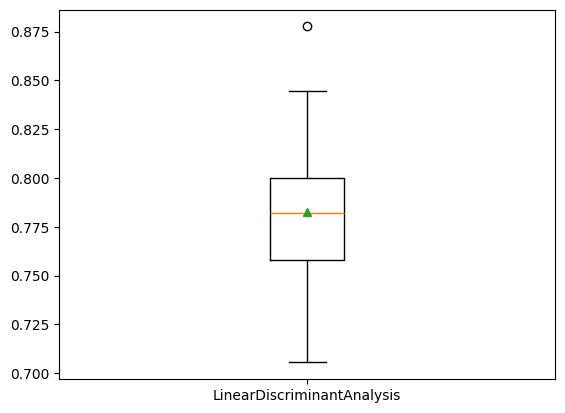

In [ ]:
plt.boxplot([scores], labels=['LinearDiscriminantAnalysis'], showmeans=True)
plt.show()
